# Gumbel Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10**6
bins = 10

In [3]:
u = np.random.random((N))

Text(0.5,1,'Uniform distribution')

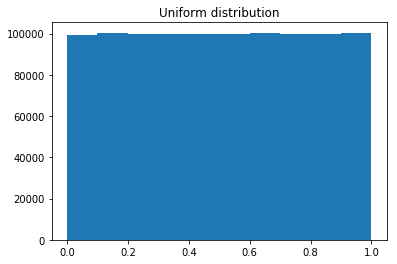

In [4]:
plt.hist(u, bins=bins);
plt.title("Uniform distribution")

In [5]:
g = -np.log(-np.log(u))

Text(0.5,1,'Gumbel distribution')

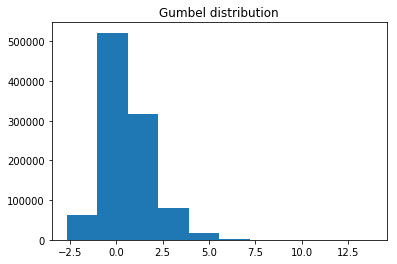

In [6]:
plt.hist(g, bins=bins);
plt.title("Gumbel distribution")

# Discrete Sampling

Goal: Sampling from a discrete distribution parametrized by $K$ unnormalized log-probabilities $\alpha_k$:

$$
    \pi_k =\frac{1}{z} \exp(\alpha_k),  \quad \textrm{where} \, z=\sum_j^K \exp(x_j)
$$

# The Gumbel Distribution tidck

Let $X$ be a discrete random variable with $P(X=k)\propto \alpha_k$ random variable and let $\{G_k\}_{k\leq K}$
be an i.i.d sequence of standard Gumbel random variables. 

Then:
$$
    X = \arg\max_k(\log \alpha_k + G_k)
$$

The algorithm
* draw Gumbel noise by transforming uniform samples
* add the noise to the $\log \alpha_k$
* take value k that produces the maximum

In [7]:
def gumbel(size, eps=1e-10):
    """ Sample from Gumbel(0, 1)"""
    u =  np.random.random(size)
    g = -np.log(-np.log(u + eps) + eps)
    return g
    
def gumbel_max_sample(x, is_prob=False):
    """ Draw a sample from P(X=k) prop x_k """
    if is_prob:
        x = np.log(x)
        
    g = gumbel(size=x.shape)
    return (g + x).argmax(axis=0)

# Relaxing the discretness

The main idea

* Any discrete random variable can be always expressed as one hot-vector
* the convex hull of the set of one-hot vector is the probability simplex:
$$
\Delta^{K-1} = \big\{ x \in R^K_+, \, \sum_{k=1}^K x_k = 1 \big\}
$$

Therefore, a natural way to extend (or ‘relax’) a discrete random variables is by allowing it to take values in the *probability simplex*. We can can consider a soft-max map, to extend the values of a discrete random variable

$$
    f_\tau (x)_k = \frac{\exp(x_k / \tau)}{\sum_{k=1}^K\exp(x_k / \tau)}
$$

In [8]:
def softmax(X, temperature = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    temperature (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """
    y = np.atleast_2d(X)

    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    y = y / float(temperature)
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    y = np.exp(y)

    # take the sum along the specified axis
    p = y / np.expand_dims(np.sum(y, axis = axis), axis)

    if len(X.shape) == 1: 
        p = p.flatten()

    return p

In [9]:
def gumbel_softmax_sample(logits, temperature=1): 
    """ Draw a sample from the Gumbel-Softmax distribution"""
    y = logits + gumbel(np.shape(logits))
    return softmax(y, temperature=temperature)

# An example sampling

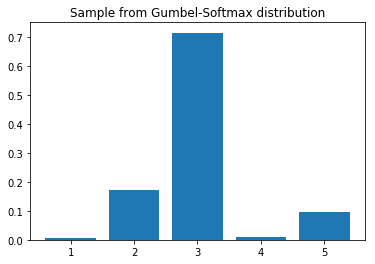

In [10]:
logits = [1, 4, 5, 1, 2]
classes = range(1, len(logits) + 1)
sample = gumbel_softmax_sample(logits, temperature=1)

plt.title("Sample from Gumbel-Softmax distribution")
plt.bar(classes, sample);